In [156]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [157]:
#reading data from .txt file
names=['f1','f2','f3','f4','label']
df=pd.read_csv('C:/Users/HP/Desktop/ML/bank-note-auth/data_banknote_authentication.txt',header=None,names=names)
df.head()

,f1,f2,f3,f4,label
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [158]:
#counting number of rows in dataset
df.count()

f1       1372
f2       1372
f3       1372
f4       1372
label    1372
dtype: int64

In [159]:
#counting frequncy of classes
print(df['label'].value_counts())

0    762
1    610
Name: label, dtype: int64


In [160]:
#checking for null values
df.isnull().sum(axis=0)

f1       0
f2       0
f3       0
f4       0
label    0
dtype: int64

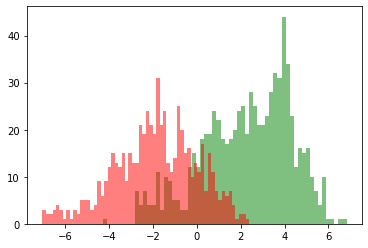

In [161]:
#Distribution of feature 1
x_0 = df.loc[df.label==0]
x_1 = df.loc[df.label==1]


plt.hist(x_0.f1,bins=60,alpha=0.5, color='g', label='fake')
plt.hist(x_1.f1,bins=60,alpha=0.5, color='r', label='real')
plt.show()

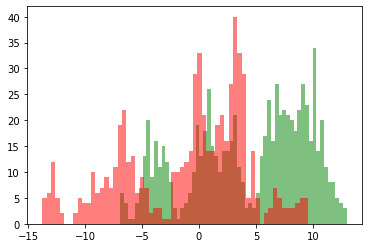

In [162]:
#Distribution of feature 2

plt.hist(x_0.f2,bins=60,alpha=0.5, color='g', label='fake')
plt.hist(x_1.f2,bins=60,alpha=0.5, color='r', label='real')
plt.show()

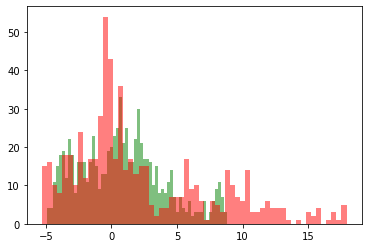

In [163]:
#Distribution of feature 3

plt.hist(x_0.f3,bins=60,alpha=0.5, color='g', label='fake')
plt.hist(x_1.f3,bins=60,alpha=0.5, color='r', label='real')
plt.show()

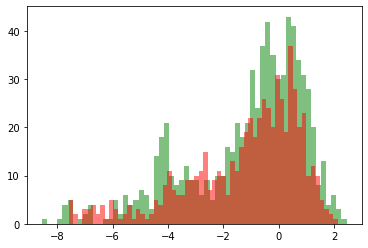

In [164]:
#Distribution of feature 4

plt.hist(x_0.f4,bins=60,alpha=0.5, color='g', label='fake')
plt.hist(x_1.f4,bins=60,alpha=0.5, color='r', label='real')
plt.show()

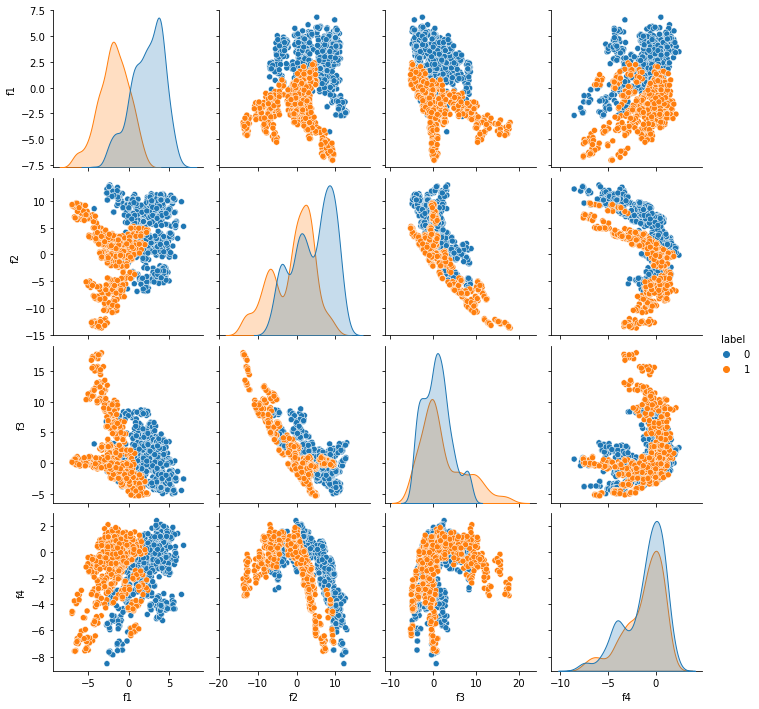

In [165]:
import seaborn as sns

#studying relationship between features
sns.pairplot(df,hue='label')

In [167]:
#standardization
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

#standardizing features
standardized_features=scaler.fit_transform(df.drop('label',axis=1))

#creating dataframe of standardized features
df_standardized=pd.DataFrame(standardized_features,columns=names[0:4])

#concatinating faetures and array
df_standardized=pd.concat([df_standardized,df['label']],axis=1)
df_standardized

,f1,f2,f3,f4,label
0,1.121806,1.149455,-0.975970,0.354561,0
1,1.447066,1.064453,-0.895036,-0.128767,0
2,1.207810,-0.777352,0.122218,0.618073,0
3,1.063742,1.295478,-1.255397,-1.144029,0
4,-0.036772,-1.087038,0.736730,0.096587,0
...,...,...,...,...,...
1367,-0.009711,-0.097693,-0.660962,0.300996,1
1368,-0.641313,-1.158984,1.179023,0.730127,1
1369,-1.472357,-2.621646,3.759017,-0.754884,1
1370,-1.406693,-1.756471,2.552043,-0.043158,1


# Model1

In [168]:
#breaking data into X and Y
df0=df_standardized[df_standardized['label']==0].to_numpy()
df1=df_standardized[df_standardized['label']==1].to_numpy()


print("count of rows with label 0: ",df0.shape)
print("count of rows with label 1: ",df1.shape)

count of rows with label 0:  (762, 5)
count of rows with label 1:  (610, 5)


In [169]:
#extracting train dataset
train=np.concatenate([df0[0:381],df1[0:305]],axis=0)
X_train=train[:,0:train.shape[1]-1]
Y_train=train[:,train.shape[1]-1]

print(X_train)
print(X_train.shape)

[[ 1.12180565  1.14945512 -0.97597007  0.35456135]
 [ 1.44706568  1.06445293 -0.89503626 -0.12876744]
 [ 1.20780971 -0.77735215  0.12221838  0.61807317]
 ...
 [-1.45328391 -2.6590249   3.75583765 -0.67917881]
 [-1.41988872 -1.44219985  2.11810596  0.33423993]
 [-1.07763198 -0.29697641  0.09237012  1.03058173]]
(686, 4)


In [170]:
#extracting test dataset
test=np.concatenate([df0[381:],df1[305:]],axis=0)
X_test=train[:,0:test.shape[1]-1]
Y_test=train[:,test.shape[1]-1]

print(X_test)
print(X_test.shape)

[[ 1.12180565  1.14945512 -0.97597007  0.35456135]
 [ 1.44706568  1.06445293 -0.89503626 -0.12876744]
 [ 1.20780971 -0.77735215  0.12221838  0.61807317]
 ...
 [-1.45328391 -2.6590249   3.75583765 -0.67917881]
 [-1.41988872 -1.44219985  2.11810596  0.33423993]
 [-1.07763198 -0.29697641  0.09237012  1.03058173]]
(686, 4)


In [171]:
#training a gaussian naive bayes classifier

from sklearn.naive_bayes import GaussianNB
clf1=GaussianNB(priors=[0.5,0.5])
clf1.fit(X_train, Y_train)

GaussianNB(priors=[0.5, 0.5])

Accuracy of model1:  0.8498542274052479

Classification report: 
               precision    recall  f1-score   support

         0.0       0.86      0.87      0.87       381
         1.0       0.83      0.83      0.83       305

    accuracy                           0.85       686
   macro avg       0.85      0.85      0.85       686
weighted avg       0.85      0.85      0.85       686



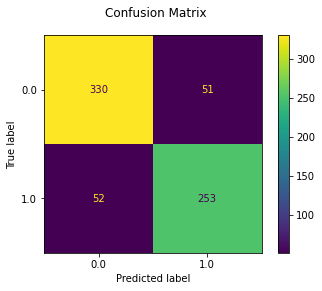

In [172]:
#evalutating test dataset
Y_pred1=clf1.predict(X_test)

#accuracy
from sklearn.metrics import accuracy_score,classification_report
acc1=accuracy_score(Y_test, Y_pred1)
print("Accuracy of model1: ",acc1)

#classification report
report=classification_report(Y_test,Y_pred1)
print("\nClassification report: \n",report)

#confusion matrix
from sklearn.metrics import plot_confusion_matrix
cm=plot_confusion_matrix(clf1,X_test,Y_test)

cm.figure_.suptitle("Confusion Matrix")
plt.show()

In [173]:
from sklearn.datasets import make_classification
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

#function to draw ROC curve
def plot_roc_curve(model, testX, testy):
    # generate a no skill prediction (majority class)
    ns_probs = [0 for _ in range(len(testy))]

    # predict probabilities
    m_probs = model.predict_proba(testX)

    # keep probabilities for the positive outcome only
    m_probs = m_probs[:, 1]

    # calculate scores
    ns_auc = roc_auc_score(testy, ns_probs)
    m_auc = roc_auc_score(testy, m_probs)

    # summarize scores
    print('No Skill: ROC AUC=%.3f' % (ns_auc))
    print('Logistic: ROC AUC=%.3f' % (m_auc))

    # calculate roc curves
    ns_fpr, ns_tpr, _ = roc_curve(testy, ns_probs)
    m_fpr, m_tpr, _ = roc_curve(testy, m_probs)

    # plot the roc curve for the model
    plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
    plt.plot(m_fpr, m_tpr, marker='.', label='Logistic')

    # axis labels
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    # show the legend
    plt.legend()
    # show the plot
    plt.show()

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.934


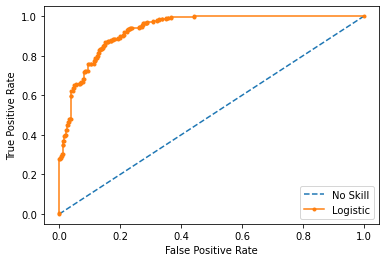

In [174]:
#plotting ROC curve
plot_roc_curve(clf1, X_test, Y_test)

# Model2

In [175]:
#training model with prior probablities [0.1,0.9]
clf2=GaussianNB(priors=[0.1,0.9])
clf2.fit(X_train, Y_train)

GaussianNB(priors=[0.1, 0.9])

In [176]:
clf2.class_prior_

array([0.1, 0.9])

Accuracy of model1:  0.7973760932944607

Classification report: 
               precision    recall  f1-score   support

         0.0       0.99      0.64      0.78       381
         1.0       0.69      0.99      0.81       305

    accuracy                           0.80       686
   macro avg       0.84      0.82      0.80       686
weighted avg       0.86      0.80      0.79       686



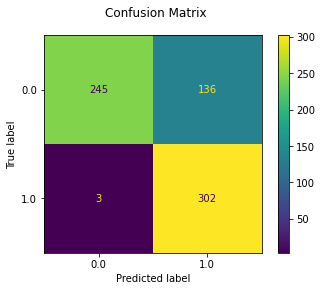

In [177]:
#evalutating test dataset
Y_pred2=clf2.predict(X_test)

#accuracy
acc2=accuracy_score(Y_test, Y_pred2)
print("Accuracy of model1: ",acc2)

#classification report
report2=classification_report(Y_test,Y_pred2)
print("\nClassification report: \n",report2)

#confusion matrix
cm2=plot_confusion_matrix(clf2,X_test,Y_test)

cm2.figure_.suptitle("Confusion Matrix")
plt.show()

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.934


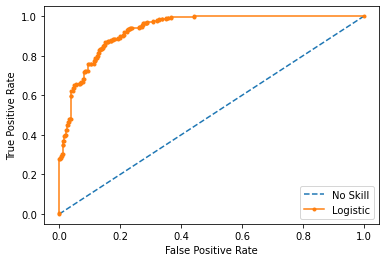

In [178]:
#ROC curve
plot_roc_curve(clf2,X_test, Y_test) 